# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [3]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [4]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

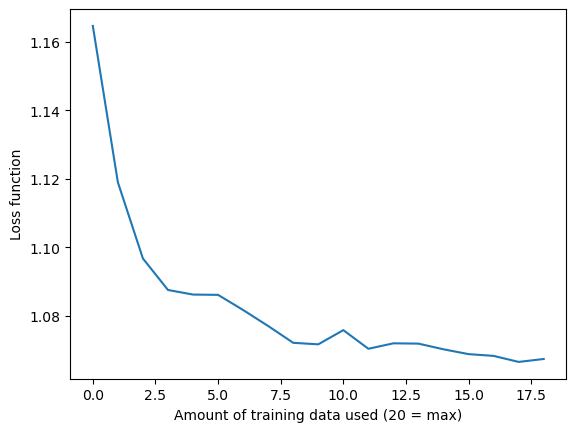

In [5]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [6]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

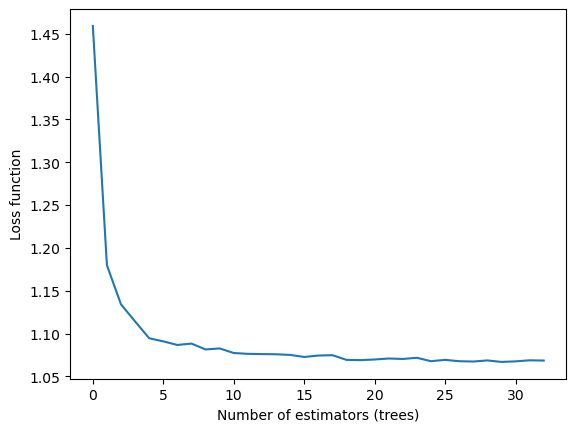

In [7]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

If I were to cut one it would be the number of trees, in my eyes the amount of training data used could offer some more insights inot the problem at hand and the graph is not as intuitive as one might think, with the decline in loss happening much faster than I had thought, while the trees plot does not look nearly as intuitive.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [9]:
car_claims_dataset = pd.read_csv("./car_claims_FE.csv")
car_claims_dataset.drop(columns=["FraudFound_No","FraudFound_Yes", "FraudFound_No.1","FraudFound_Yes.1", "Age.1"], inplace=True)
car_claims_dataset

,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,Make_Accura,Make_BMW,Age,Deductible,Make_Chevrolet,Make_Dodge,Make_Ferrari,...,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,VehiclePrice,DriverRating,AccidentArea_Rural,AccidentArea_Urban,FraudFound
0,False,True,False,False,False,21,300,False,False,False,...,False,False,False,False,False,69000.0,1,False,True,0
1,False,True,False,False,False,34,400,False,False,False,...,False,False,False,False,False,69000.0,4,False,True,0
2,False,True,False,False,False,47,400,False,False,False,...,False,False,False,False,False,69000.0,3,False,True,0
3,False,True,False,False,False,65,400,False,False,False,...,False,False,False,True,False,24500.0,2,True,False,0
4,False,True,False,False,False,27,400,False,False,False,...,False,False,False,False,False,69000.0,1,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,True,False,False,False,False,35,400,False,False,False,...,False,False,False,True,False,24500.0,4,False,True,1
15416,False,True,False,False,False,30,400,False,False,False,...,False,False,False,False,False,34500.0,3,False,True,0
15417,True,False,False,False,False,24,400,False,False,False,...,False,False,False,True,False,24500.0,4,True,False,1
15418,True,False,False,False,False,34,400,False,False,False,...,False,False,False,True,False,24500.0,4,False,True,0


In [14]:
from sklearn.model_selection import train_test_split
X = car_claims_dataset.drop(columns=["FraudFound"],inplace=False)
y = car_claims_dataset["FraudFound"]

X_train_car_claims, X_test_car_claims, y_train_car_claims, y_test_car_claims = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Getting a base accuracy and using random forrest classifier since this is a classification dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


random_forrest_car_claims = RandomForestClassifier( # these will be the base params I use, I want to make a 'dumb' model to prevent overfitting early
    n_estimators=50,    
    max_depth=5,        
    min_samples_split=10, 
    min_samples_leaf=5, 
    max_features='sqrt',
    random_state=42
)
random_forrest_car_claims.fit(X_train_car_claims,y_train_car_claims)
car_claims_base_preds = random_forrest_car_claims.predict(X_train_car_claims)
accuracy_base = accuracy_score(y_train_car_claims,car_claims_base_preds)
print(f"Accuracy Base for Car Calims: {accuracy_base}")

Accuracy Base for Car Calims: 0.941147859922179


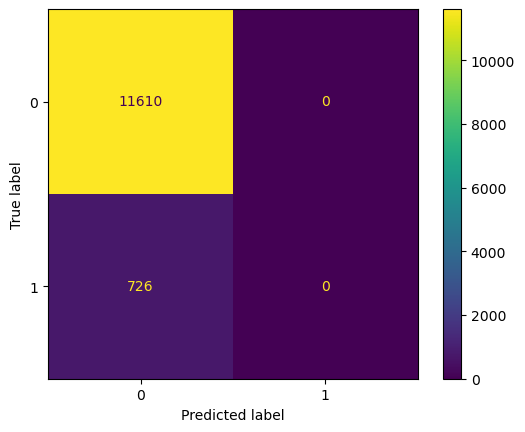

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_car_claims_base = confusion_matrix(y_train_car_claims,car_claims_base_preds)
confusion_matrix_display_base = ConfusionMatrixDisplay(cm_car_claims_base)
confusion_matrix_display_base.plot()
plt.show()

In [56]:
#since the dataset is unbalanced we should use a roc auc curve
from sklearn.metrics import roc_auc_score 
roc_score_car_claims_base = roc_auc_score(y_train_car_claims,car_claims_base_preds)
print(f"Base score: {roc_score_car_claims_base}")

Base score: 0.5


In [101]:
from sklearn.model_selection import RandomizedSearchCV
rcv_car_claims = RandomizedSearchCV(
    estimator= RandomForestClassifier(),
    param_distributions={
        'n_estimators' : [50,100,150,200],
        'max_depth' : [15,30,45,60],
        "max_features": [7, 14, 21,28],
        "min_samples_leaf" : [2,3,4,5],
        'min_samples_split' : [2,3,4,5],
        'criterion' : ['gini', 'entropy'],
        'random_state' : [42]
    },
    scoring="roc_auc"
)

rcv_car_claims.fit(X_train_car_claims,y_train_car_claims)

best_params = rcv_car_claims.best_params_
best_score = rcv_car_claims.best_score_

In [102]:
print(f"Best Params Randomized Search {rcv_car_claims.best_params_}")
print(f"Best Accuracy Score Randomized Search {rcv_car_claims.best_score_}")

Best Params Randomized Search {'random_state': 42, 'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 14, 'max_depth': 15, 'criterion': 'gini'}
Best Accuracy Score Randomized Search 0.6800629964476896


In [18]:
print(len(X_train_car_claims.columns))

28


In [105]:
#now lets tune some hyperparameters for this, we are going to use gridsearch to perform an exauhstive search over the parameters and find which combination works the best
param_grid_rf_car_claims = {
    'n_estimators': list(range(40,111,10)), 
    'max_features': list(range(10,16,3)),
    'max_depth' : list(range(10,20,3)),
    'criterion' : ['entropy'],
    'min_samples_leaf': list(range(2,6,2)),
    'min_samples_split' : list(range(2,6,2))
}

grid_car_claims = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf_car_claims,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,        # leverage all available cores
) #cross validating 3 times to save compute

grid_car_claims.fit(X_train_car_claims,y_train_car_claims)



GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [10, 13, 16, 19],
                         'max_features': [10, 13], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110]},
             scoring='roc_auc')

In [107]:
print(f"Grid Search Best Score: {grid_car_claims.best_score_}")
print(f"Grid Search Best Params: {grid_car_claims.best_params_}")

Grid Search Best Score: 0.6831461194040477
Grid Search Best Params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [41]:
insurance_claims_numeric = pd.read_csv("./insurance_claims_numericFE.csv")
X_insruance_claims = insurance_claims_numeric.drop(columns="fraud_reported", inplace =False)
y_insurance_claims = insurance_claims_numeric["fraud_reported"]
X_train_insurance_claims, X_test_insurance_claims, y_train_insruance_claims, y_test_insurance_claims = train_test_split(X_insruance_claims,y_insurance_claims,test_size=0.2,random_state=42)
 

In [82]:
random_forrest_insurance_claims = RandomForestClassifier(
    n_estimators=50,    
    max_depth=5,        
    min_samples_split=10,
    min_samples_leaf=8, 
    max_features=3,
    random_state=42
)
random_forrest_insurance_claims.fit(X_train_insurance_claims,y_train_insruance_claims)
random_forrest_base_preds_ = random_forrest_insurance_claims.predict(X_train_insurance_claims)
accuracy_of_preds = accuracy_score(y_train_insruance_claims,random_forrest_base_preds_)

print(f"Base Accuracy Without Hyper Parameter tuning on the dataset: {accuracy_of_preds}")

Base Accuracy Without Hyper Parameter tuning on the dataset: 0.7666666666666667


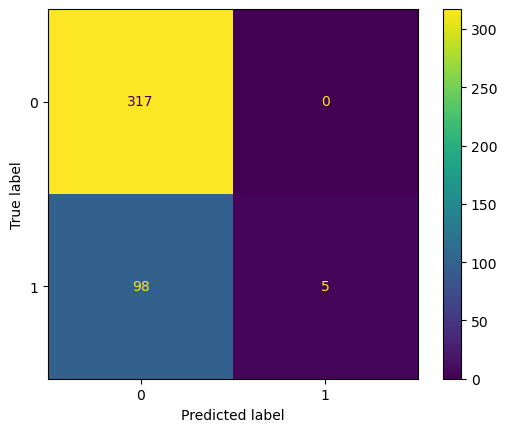

In [83]:
cm_insurance_claims_base = confusion_matrix(y_train_insruance_claims,random_forrest_base_preds_)
confusion_matrix_display_base_insruance = ConfusionMatrixDisplay(cm_insurance_claims_base)
confusion_matrix_display_base_insruance.plot()

In [84]:
roc_score_insurance_claims_base = roc_auc_score(y_train_insruance_claims,random_forrest_base_preds_) # like the previous dataset, this one is quuite imbalanced, I will be using ROC_AUC moving forward
print(f"Base score: {roc_score_insurance_claims_base}")

Base score: 0.5242718446601942


In [63]:
print(len(X_insruance_claims.columns))

9


In [87]:

rcv_insurance_claims = RandomizedSearchCV(
    estimator= RandomForestClassifier(),
    param_distributions={
        'n_estimators' : [50,60,70,80],
        'max_depth' : [15,20,25,30],
        "max_features": [7,8,9],
        "min_samples_leaf" : [2,3,4,5],
        'min_samples_split' : [2,3,4,5],
        'criterion' : ['gini', 'entropy'],
        'random_state' : [42]
    },
    scoring="roc_auc"
)


rcv_insurance_claims.fit(X_train_insurance_claims,y_train_insruance_claims)
print(f"Best Params using Randomized Search: {rcv_insurance_claims.best_params_}")
print(f"Best Score using Randomized Search: {rcv_insurance_claims.best_score_}")


Best Params using Randomized Search: {'random_state': 42, 'n_estimators': 60, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 8, 'max_depth': 30, 'criterion': 'entropy'}
Best Score using Randomized Search: 0.5353798185941043


In [104]:
#now lets tune some hyperparameters for this, we are going to use gridsearch to perform an exauhstive search over the parameters and find which combination works the best
param_grid_rf_car_claims = {
    'n_estimators': list(range(50,111,10)), 
    'max_features': list(range(3,8,2)),
    'max_depth' : list(range(20,40,5)),
    'criterion' : ['entropy'],
    'min_samples_leaf': list(range(2,6,2)),
    'min_samples_split' : list(range(2,6,2))
}

grid_insruance_data = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf_car_claims,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,        # leverage all available cores
) #cross validating 3 times to save compute

grid_insruance_data.fit(X_train_insurance_claims,y_train_insruance_claims)



c:\Users\Joe\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [20, 25, 30, 35],
                         'max_features': [3, 5, 7], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110]},
             scoring='roc_auc')

In [108]:
print(f"Grid Search Best Score: {grid_insruance_data.best_score_}")
print(f"Grid Search Best Params: {grid_insruance_data.best_params_}")

Grid Search Best Score: 0.5519310365655695
Grid Search Best Params: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 60}


In [3]:
general_fraud_data_auto_numeric = pd.read_csv("./general_fraud_autoFE.csv")
general_fraud_data_auto_numeric.columns

Index(['SOCIAL_CLASS_HI', 'SOCIAL_CLASS_LI', 'SOCIAL_CLASS_MI',
       'EMPLOYMENT_STATUS_N', 'EMPLOYMENT_STATUS_Y', 'PREMIUM_AMOUNT',
       'CLAIM_AMOUNT', 'RISK_SEGMENTATION', 'INCIDENT_SEVERITY'],
      dtype='object')

In [97]:
X_general = general_fraud_data_auto_numeric.drop(columns=["CLAIM_AMOUNT"],inplace=False)
y_general = general_fraud_data_auto_numeric["CLAIM_AMOUNT"]
X_general_train, X_general_test, y_general_train,y_general_test = train_test_split(X_general,y_general,test_size=0.2,random_state=42)
rfr = RandomForestRegressor(
    n_estimators=50,    
    max_depth=5,        
    min_samples_split=10,
    min_samples_leaf=10, 
    max_features=3,
    random_state=42
)
rfr.fit(X_general_train,y_general_train)
preds_rfr_base = rfr.predict(X_general_train)
rmse_base = root_mean_squared_error(preds_rfr_base,y_general_train)

print(f"RMSE with Base Model: {rmse_base}")

RMSE with Base Model: 2803.2460931006585


In [99]:
rcv_general = RandomizedSearchCV(
    estimator= RandomForestRegressor(),
    param_distributions={
        'n_estimators' : [50,60,70,80],
        'max_depth' : [15,20,25,30],
        "max_features": [7,8,9],
        "min_samples_leaf" : [2,3,4,5],
        'min_samples_split' : [2,3,4,5],
        'random_state' : [42]
    },
    scoring="neg_root_mean_squared_error"
)

rcv_general.fit(X_general_train,y_general_train)

print(f"Best score of RCV Regression: {rcv_general.best_score_ * -1}")
print(f"Best params of RCV Regression: {rcv_general.best_params_}")

Best score of RCV Regression: 2991.3034634251594
Best params of RCV Regression: {'random_state': 42, 'n_estimators': 80, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 7, 'max_depth': 15}


In [110]:
#now lets tune some hyperparameters for this, we are going to use gridsearch to perform an exauhstive search over the parameters and find which combination works the best
param_grid_general = {
    'n_estimators': list(range(70,150,10)), 
    'max_features': list(range(3,8,2)),
    'max_depth' : list(range(10,20,2)),
    'min_samples_leaf': list(range(2,6,2)),
    'min_samples_split' : list(range(2,6,2))
}

grid_general = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_general,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,        # leverage all available cores
) #cross validating 3 times to save compute

grid_general.fit(X_general_train,y_general_train)



c:\Users\Joe\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 12, 14, 16, 18],
                         'max_features': [3, 5, 7], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [70, 80, 90, 100, 110, 120, 130, 140]},
             scoring='neg_root_mean_squared_error')

In [111]:
print(f"Grid Search Best Score: {grid_general.best_score_}")
print(f"Grid Search Best Params: {grid_general.best_params_}")

Grid Search Best Score: -2971.5890804647897
Grid Search Best Params: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 80}


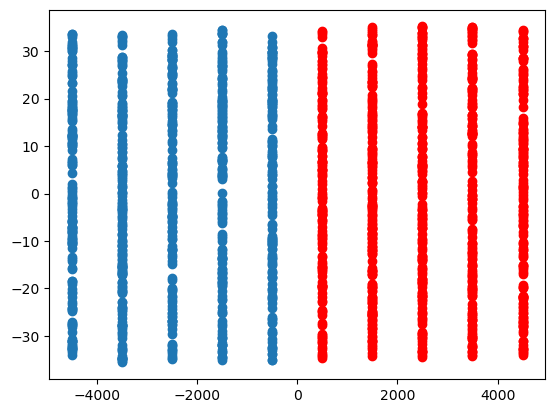

In [27]:
#since this is best suited for unsupervised learning I think K means Clustering could provide in some additional insights into the data

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_ = PCA(2)

general_fraud_data_auto_numeric_pca = pca_.fit_transform(general_fraud_data_auto_numeric)

kmeans = KMeans(n_clusters=2)

labels = kmeans.fit_predict(general_fraud_data_auto_numeric_pca)

filtered_data0 = general_fraud_data_auto_numeric_pca[labels==0]

filtered_data1 = general_fraud_data_auto_numeric_pca[labels==1]



plt.scatter(filtered_data0[:,0] , filtered_data0[:,1])
plt.scatter(filtered_data1[:,0] , filtered_data1[:,1],c="red")

None

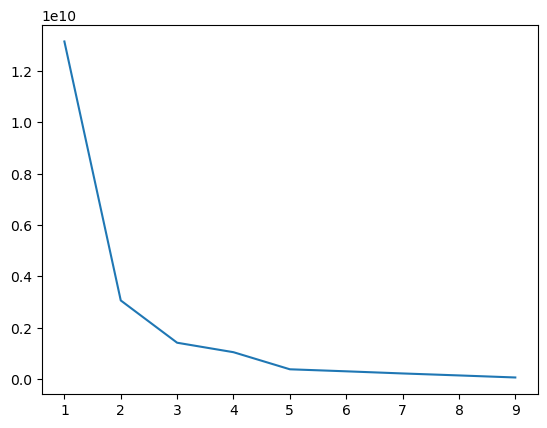

In [28]:
#running the elbow method to find the optimal amount of clusters to use

plot_values = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(general_fraud_data_auto_numeric_pca)
    plot_values.append(kmeans.inertia_)
    
    
plt.plot(range(1, 10), plot_values)

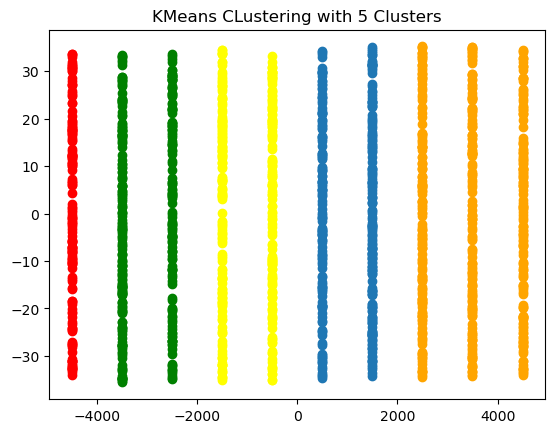

In [31]:
# looks like the optimal value to use here is five

kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(general_fraud_data_auto_numeric_pca)

filtered_data0 = general_fraud_data_auto_numeric_pca[labels==0]

filtered_data1 = general_fraud_data_auto_numeric_pca[labels==1]

filtered_data2 = general_fraud_data_auto_numeric_pca[labels==2]

filtered_data3 = general_fraud_data_auto_numeric_pca[labels==3]

filtered_data4 = general_fraud_data_auto_numeric_pca[labels==4]



plt.scatter(filtered_data0[:,0] , filtered_data0[:,1])
plt.scatter(filtered_data1[:,0] , filtered_data1[:,1],c="red")
plt.scatter(filtered_data2[:,0] , filtered_data2[:,1], c="yellow")
plt.scatter(filtered_data3[:,0] , filtered_data3[:,1],c="orange")
plt.scatter(filtered_data4[:,0] , filtered_data4[:,1], c="green")
plt.title("KMeans CLustering with 5 Clusters")
None

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.